<a href="https://colab.research.google.com/github/nedosh/StochasticProcesses/blob/main/Donskers_theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from scipy.stats import norm, expon, beta, cauchy
import numpy as np

N = 10000

sample_donsker = np.array([])
distr = beta
args=[3, 5]

def time(n):
    return 3*n

def donsker(n):
    global sample_donsker
    sample_new = (distr.rvs(*args, size=time(n)-time(n-1)) - distr.mean(*args) )/distr.std(*args)
    sample_donsker = np.concatenate([sample_donsker, sample_new], axis=0)
    y = np.cumsum(sample_donsker)/np.sqrt(sample_donsker.shape[0]) 
    x = np.linspace(0, 1, y.shape[0])
    # x = np.linspace(0, 1, 2*n)
    return (x, y)


y_global = np.linspace(0, np.pi, N) * norm.rvs(size=1) / np.sqrt(np.pi)

def BM_fourier(n):
    global y_global

    x = np.linspace(0, np.pi, N)  
    sample_new = norm.rvs(size=1)
    y_global += np.sqrt(2./np.pi) * np.sin(n*x) * sample_new / n
    return (x, y_global)

<IPython.core.display.Javascript object>


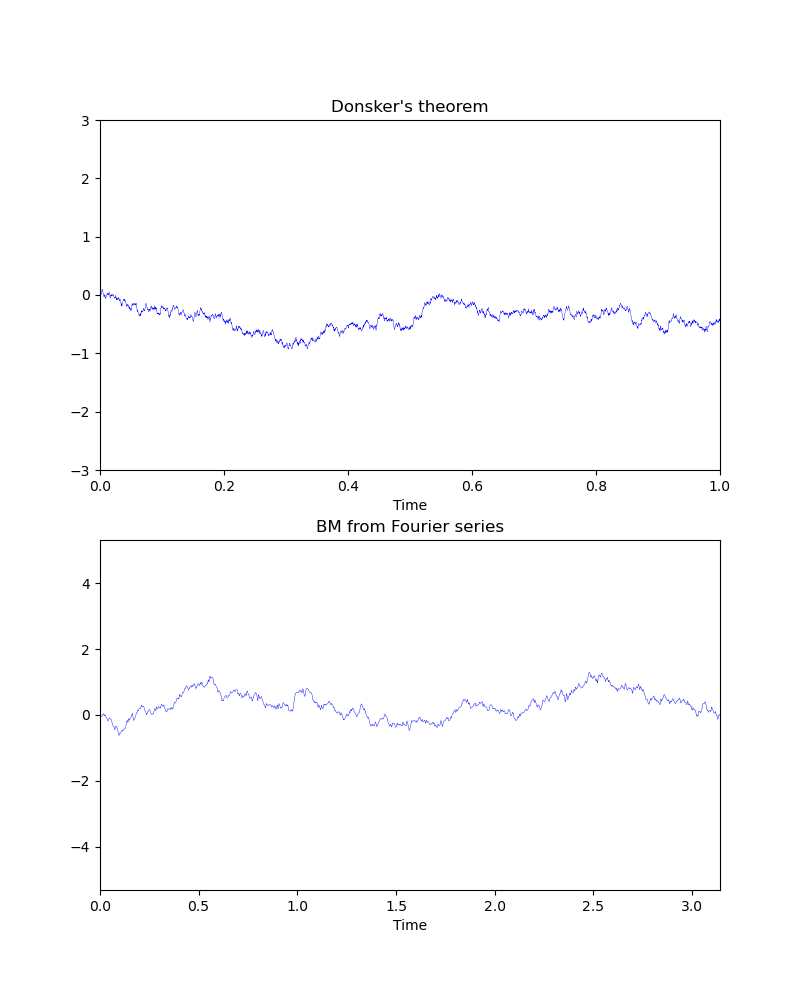

In [64]:
%matplotlib notebook

from matplotlib import animation
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

# create a figure and axes
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,10))


# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
# txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=0.3)
line2, = ax2.plot([], [], 'b', lw=0.3)



def init():
    ax1.set_xlim(0, 1)
    ax1.set_ylim(-3, 3)
    ax1.set_xlabel('Time')
    ax1.set_title("Donsker's theorem")
    
    ax2.set_xlim(0, np.pi)
    ax2.set_ylim(-3*np.sqrt(np.pi), 3*np.sqrt(np.pi))
    ax2.set_xlabel('Time')
    ax2.set_title("BM from Fourier series")
    # ax.legend(['sin','cos']);
    return line,

def update(frame):
    line1.set_data(donsker(frame))
    line2.set_data(BM_fourier(frame))
    return (line1,line2)

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, update, 
                               frames=range(1, 10**3), 
                               interval=2, 
                               init_func=init, 
                               repeat=False,
                               blit=False)


plt.show()